## IFT6135 Projet: ICLR2018 Reproducibility Challenge
####  Paper: Certifying Some Distributional Robustness With Principled Adversarial Training

Names: Xiao Fan (20086722) ,  Zhibin Lu (20091078)

In [2]:
import os
import importlib
import time
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
import torch.nn.functional as F
from torch.autograd import Variable
import torchvision
import torchvision.transforms
import torch.utils.data.sampler as sampler
import matplotlib.pyplot as plt

# path = 'C:/Users/lingyu.yue/Documents/Xiao_Fan/GAN'
path="/Users/louis/Google Drive/M.Sc-DIRO-UdeM/IFT6135-Apprentissage de représentations/projet/"
if os.path.isdir(path):
    os.chdir(path)
else:
    os.chdir("./")
print(os.getcwd())

import exp1
import mnist
importlib.reload(exp1)
importlib.reload(mnist)
USE_CUDA=torch.cuda.is_available()
exp1.init_seed()

/Users/louis/Google Drive/M.Sc-DIRO-UdeM/IFT6135-Apprentissage de représentations/projet
/Users/louis/Google Drive/M.Sc-DIRO-UdeM/IFT6135-Apprentissage de représentations/projet
Loaded MNIST data, total 70000
/Users/louis/Google Drive/M.Sc-DIRO-UdeM/IFT6135-Apprentissage de représentations/projet
Loaded MNIST data, total 70000


### Load MNIST data

In [3]:
NO_CLASSES = 10
TRAIN_DATA_SIZE = 50000
BATCH_SIZE = 128

mnist_transforms = torchvision.transforms.Compose([torchvision.transforms.ToTensor()])
mnist_train = torchvision.datasets.MNIST(root='./data', train=True, transform=mnist_transforms, download=True)
mnist_test = torchvision.datasets.MNIST(root='./data', train=False, transform=mnist_transforms, download=True)
indices = list(range(len(mnist_train)))
np.random.shuffle(indices)
train_idx, valid_idx = indices[:TRAIN_DATA_SIZE], indices[TRAIN_DATA_SIZE:]
train_sampler = sampler.SubsetRandomSampler(train_idx)
valid_sampler = sampler.SubsetRandomSampler(valid_idx)
train_data_loader = torch.utils.data.DataLoader(
    mnist_train, batch_size=BATCH_SIZE, sampler=train_sampler, num_workers=10)
valid_data_loader = torch.utils.data.DataLoader(
    mnist_train, batch_size=BATCH_SIZE,  sampler=valid_sampler, num_workers=10)
test_data_loader = torch.utils.data.DataLoader(mnist_test, batch_size=BATCH_SIZE, shuffle=True, num_workers=10)
print('Loaded MNIST data, total',len(mnist_train)+len(mnist_test))

Loaded MNIST data, total 70000


## Sample

/Users/louis/Google Drive/M.Sc-DIRO-UdeM/IFT6135-Apprentissage de représentations/projet
Loaded MNIST data, total 70000
==> Resuming from checkpoint..
<class 'torch.FloatTensor'>
torch.Size([1, 28, 28])


Columns 0 to 9 
 0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000
 0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000
 0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000
 0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000
 0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000
 0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000
 0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000
 0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000
 0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000
 0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0

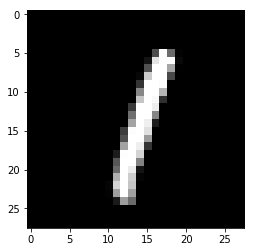

In [48]:
importlib.reload(exp1)
importlib.reload(mnist)

filename='mnist_wrm_elu_ep42'
mnist_WRM=mnist.Mnist_Estimateur(activation='elu')
mnist_WRM,_=exp1.loadCheckpoint(mnist_WRM,filename)
# print('Accuracy on test data: ',exp1.evaluate(mnist_WRM,test_data_loader))

# indices = list(range(len(5)))
# np.random.shuffle(indices)
# samples_data=
# fig = plt.figure(figsize=(10, 10))
# fig.add_subplot(4, 4, 1 + 1)
print(type(mnist_test[1][0]))
print(mnist_test[5][0].size())
plt.imshow(mnist_test[5][0][0], cmap='gray')
print(mnist_test[5][0][0])
# plt.axis('off')